# Understanding Influences of Win Rate in League of Legends

***
## Group Name: Group 52

## Student Names:

- Anton Angelo Carasig (s306344)
- Khang Nguyen (s3894597)
- Oliver Guzowski (s3897734)

***
## Table of Contents:
* [Introduction](#itr)
    + [Dataset Source](#dss)
    + [Dataset Details](#dsd)
* [Context and Glossary](#cag)
* [Dataset Features](#dsf)
* [Response Variable](#rsv)
* [Goals and Objectives](#gao)
* [Data Preprocessing](#dpp)
    + [Data Retrieval](#drt)
    + [Data Cleaning](#dclean)
    + [Random Sampling](#rsp)
* [Data Visualization](#dvz)
    + [Univariate Analysis](#uniana)
    + [Bivariate Analysis](#biana)
    + [Multivariate Analysis](#multiana)
* [Literature Review](#litrev)
    + [Introduction](#litintro)
    + [Cooperation and Behaviour](#litcab)
    + [Dysfunctionality Within a Team](#litdys)
    + [Priority Within a Team](#litprio)
    + [Motivation](#litmot)
    + [Conclusion](#litconc)
* [Summary and Conclusion](#sumconc)

***
## Introduction <a id='itr'></a>

### Dataset Source <a id='dss'></a>

The League of Legends Diamond Ranked Games dataset used in this study was obtained from Kaggle ("michel's fanboy", 2021). This dataset contains the first 10 mins of roughly 10,000 ranked games, with players ranked from DIAMOND 1 to MASTER using the "Solo Queue" feature of the game.

### Dataset Details <a id='dsd'></a>

The dataset holds information regarding the first 10 minutes of League of Legends "Diamond" ranked games, a multiplayer online battle arena (MOBA) where 2 teams of 5 players are pitted against each other (Blue vs Red). A ranked-game is a gamemode where players of similar skill level are placed in a match against each other. As this dataset only contains "Diamond" to "Master" ranked players, the population only contains players with a high mechanical skill level. In addition, the "Solo-Queue" feature of the game indicates that an individual is randomly selected and placed in a team with other individuals, solidifying the randomization element of the game and indicating a "temporary" team structure - team members have never communicate with each other before and must work together to win the match.

The dataset main features contain information about whether a team had won the match, how much gold a team has accumulated, numbers of kills and deaths. There are additional features that further details the team's action throughout the first 10 minutes, such as how many wards placed, number of minions vanquished, and number of towers (The opposing team's defense mechanism) were destroyed. There are also features that describes the team's performance such as the average level between all 5 players, the total experience the players have earned as well as their gold gain per minute.

There are 9879 unique observations within the dataset and 19 features for each team, Blue and Red, totaling 38 features.

***
## Context and Glossary <a id='cag'></a>

* League of Legends (LoL)
* Multiplayer Online Battle Arena (MOBA)
* ELO: A rating system that determines the quality of a player in a team. Diamond players are in the top 0.5% of the LoL playerbase.

Team-Specific Objectives: <i>(These objectives must be accomplished by either team to win)</i>

* Nexus: The main objective of the game, destroying the enemy nexus declares your team as the winner.
* Towers/Turrets: Structures that must be destroyed to reach the enemy nexus.

Other terminology:
* Elite Monsters: Monsters that provide high gold/xp to the player that defeats it.
* Dragon: A monster that gives bonuses to the team that defeats it.
* Herald: A monster that assists in knocking down the enemy turrets.
* Wards: Are team specific, purchaseable items. They provide "vision" to the team, allowing to see where enemies and objectives are currently; vital for making co-ordinated plays in higher ELO games and overall control of the game.
* Champion: The character that the player is controlling.
* Level: The level of the champion that the player is controlling. Gaining XP increases champion level. Starts at level 1 when the game starts, the maximum level is 18.
* First Blood: The first player that kills another player in the game gets extra gold, putting them at an advantage of others.

***
## Dataset Features<a id='dsf'></a>

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [96]:
import pandas as pd

table = [['gameId','Nominal categorical','NA','Unique RIOT ID of the game. Can be used with the Riot Games API.'],
         ['blueWins','Binary','NA','The target column. 1 if the blue team has won, 0 otherwise.'],
         ['blueWardsPlaced','Numeric','NA','Number of warding totems placed by the blue team on the map'],
         ['blueWardsDestroyed','Numeric','NA','Number of enemy warding totems the blue team has destroyed'],
         ['blueFirstBlood','Binary','NA','First kill of the game. 1 if the blue team did the first kill, 0 otherwise'],
         ['blueKills','Numeric','NA','Number of enemies killed by the blue team'],
         ['blueDeaths','Numeric','NA','Number of deaths (blue team)'],
         ['blueAssists','Numeric','NA','Number of kill assists (blue team)'],
         ['blueEliteMonsters','Numeric','NA','Number of elite monsters killed by the blue team (Dragons and Heralds)'],
         ['blueDragons','Numeric','NA','Number of dragons killed by the blue team'],
         ['blueHeralds','Numeric','NA','Number of heralds killed by the blue team'],
         ['blueTowersDestroyed','Numeric','NA','Number of structures destroyed by the blue team (towers...)'],
         ['blueTotalGold','Numeric','NA','Blue team total gold'],
         ['blueAvgLevel','Numeric','NA','Blue team average champion level'],
         ['blueTotalExperience','Numeric','NA','Blue team total experience'],
         ['blueTotalMinionsKilled','Numeric','NA','Blue team total minions killed (CS)'],
         ['blueTotalJungleMinionsKilled','Numeric','NA','Blue team total jungle monsters killed'],
         ['blueGoldDiff','Numeric','NA','Blue team gold difference compared to the enemy team'],
         ['blueExperienceDiff','Numeric','NA','Blue team experience difference compared to the enemy team'],
         ['blueCSPerMin','Numeric','cs/min','Blue team CS (minions) per minute'],
         ['blueGoldPerMin','Numeric','gold/min','Blue team gold per minute'],
         ['redWardsPlaced','Numeric','NA','Number of warding totems placed by the red team on the map'],
         ['redWardsDestroyed','Numeric','NA','Number of enemy warding totems the red team has destroyed'],
         ['redFirstBlood','Binary','NA','First kill of the game. 1 if the red team did the first kill, 0 otherwise'],
         ['redKills','Numeric','NA','Number of enemies killed by the red team'],
         ['redDeaths','Numeric','NA','Number of deaths (red team)'],
         ['redAssists','Numeric','NA','Number of kill assists (red team)'],
         ['redEliteMonsters','Numeric','NA','Number of elite monsters killed by the red team (Dragons and Heralds)'],
         ['redDragons','Numeric','NA','Number of dragons killed by the red team'],
         ['redHeralds','Numeric','NA','Number of heralds killed by the red team'],
         ['redTowersDestroyed','Numeric','NA','Number of structures destroyed by the red team (towers...)'],
         ['redTotalGold','Numeric','NA','Red team total gold'],
         ['redAvgLevel','Numeric','NA','Red team average champion level'],
         ['redTotalExperience','Numeric','NA','Red team total experience'],
         ['redTotalMinionsKilled','Numeric','NA','Red team total minions killed (CS)'],
         ['redTotalJungleMinionsKilled','Numeric','NA','Red team total jungle monsters killed'],
         ['redGoldDiff','Numeric','NA','Red team gold difference compared to the enemy team'],
         ['redExperienceDiff','Numeric','NA','Red team experience difference compared to the enemy team'],
         ['redCSPerMin','Numeric','cs/min','Red team CS (minions) per minute'],
         ['redGoldPerMin','Numeric','gold/min','Red team gold per minute']]

df = pd.DataFrame(table, columns = ['Name','Data Type','Units','Description']) 
df.style

,Name,Data Type,Units,Description
0,gameId,Nominal categorical,NA,Unique RIOT ID of the game. Can be used with the Riot Games API.
1,blueWins,Binary,NA,"The target column. 1 if the blue team has won, 0 otherwise."
2,blueWardsPlaced,Numeric,NA,Number of warding totems placed by the blue team on the map
3,blueWardsDestroyed,Numeric,NA,Number of enemy warding totems the blue team has destroyed
4,blueFirstBlood,Binary,NA,"First kill of the game. 1 if the blue team did the first kill, 0 otherwise"
5,blueKills,Numeric,NA,Number of enemies killed by the blue team
6,blueDeaths,Numeric,NA,Number of deaths (blue team)
7,blueAssists,Numeric,NA,Number of kill assists (blue team)
8,blueEliteMonsters,Numeric,NA,Number of elite monsters killed by the blue team (Dragons and Heralds)
9,blueDragons,Numeric,NA,Number of dragons killed by the blue team


***
## Target Response Variable:<a id='rsv'></a>



This project's target feature in the dataset will be `blueWins` (1 = Blue won, 0 = Red won). We will be observing what factors play a more contributive role to this boolean value.

***
## Goals and Objectives:<a id='gao'></a>

Recent years has shown exponential growth towards the eSports genre, with League of Legends currently standing as one of the most popular video game and eSport being played in the world with over 8 million daily players according to the developers [Riot Games](https://www.leagueoflegends.com/en-us/news/game-updates/). Taking in the top 0.5% of players of such a large player-base into account, it becomes vital to understand what factors contribute the most into a winning game, where minor advantages to a team can snowball heavily into a win. Game data analytics further allow developers to study patterns in player behavior and overall trends within a game, with such analysis enabling shifts in the game meta that suits the company's goals. Such understanding in turn enables for a model that can decipher the weighted importance of each factor of the game, whether that be 'First Bloods', 'Dragons' or some other objective. Conclusively, it enables future features to be implemented, suited to support the company's agenda such as a more passive-focused game average with lower kill-counts or a more hyper-aggressive objective focus that places a neutral objective such as the 'Herald' at a high importance. 

In essence, the main objective of this project is to decipher which factors contribute the most into a conclusive win. Exploratory data analysis utilizing descriptive statistics and data visualization tools will be used to assist in offering insight as to the different patterns and relationships that can be seen within LoL ranked games. Doing so will enable us to achieve our end-goal for the project, as well as offering extra understanding to the prominence that other factors may play in generating a winning lead for the team.

***
## Data Preprocessing<a id='dpp'></a>

### Data Retrieval<a id='drt'></a>

+ We will being the data preprocessing by importing the dataset and displaying 10 randomly selected rows.

In [97]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
df = df.style.set_precision(3)

df = pd.read_csv("ranked_games.csv")
df.sample(10, random_state=999)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
4387,4487157845,0,20,5,1,4,5,7,0,0,0,0,15067,6.8,17232,172,56,-1641,-1610,17.2,1506.7,19,4,0,5,4,10,0,0,0,0,16708,7.4,18842,254,52,1641,1610,25.4,1670.8
3500,4525068217,0,16,25,0,5,7,5,0,0,0,0,16763,7.2,19010,252,48,-729,-620,25.2,1676.3,43,5,1,7,5,6,2,1,1,0,17492,7.2,19630,241,61,729,620,24.1,1749.2
790,4524662465,1,16,1,0,11,4,18,1,1,0,0,19695,7.2,19512,258,48,3936,2111,25.8,1969.5,12,2,1,4,11,4,1,0,1,0,15759,7.0,17401,205,68,-3936,-2111,20.5,1575.9
7993,4484601181,1,16,0,0,8,5,8,2,1,1,0,17390,7.2,19016,212,60,1716,1837,21.2,1739.0,15,1,1,5,8,8,0,0,0,0,15674,6.8,17179,226,36,-1716,-1837,22.6,1567.4
4910,4513962663,0,20,2,1,8,7,5,1,0,1,0,16815,7.0,18326,207,41,10,223,20.7,1681.5,19,6,0,7,8,8,0,0,0,0,16805,6.8,18103,241,48,-10,-223,24.1,1680.5
3156,4519875448,0,21,5,1,6,5,14,1,1,0,0,16986,7.0,17323,231,55,313,-1776,23.1,1698.6,16,8,0,5,6,3,1,0,1,0,16673,7.2,19099,236,56,-313,1776,23.6,1667.3
7490,4510135143,0,48,2,1,7,5,10,0,0,0,0,17037,7.0,17825,237,40,987,-377,23.7,1703.7,15,5,0,5,7,5,2,1,1,0,16050,7.0,18202,219,60,-987,377,21.9,1605.0
6340,4452482397,1,15,4,1,4,4,3,0,0,0,0,14559,6.8,17491,191,44,-1348,-10,19.1,1455.9,91,2,0,4,4,6,1,0,1,0,15907,6.6,17501,202,54,1348,10,20.2,1590.7
7662,4484391297,1,13,2,0,4,4,0,1,0,1,1,17079,7.4,19361,250,66,1680,2384,25.0,1707.9,50,2,1,4,4,3,0,0,0,0,15399,6.6,16977,200,62,-1680,-2384,20.0,1539.9
210,4490435808,0,13,5,1,5,5,8,1,0,1,0,16009,6.8,18033,220,40,540,269,22.0,1600.9,15,2,0,5,5,8,1,1,0,0,15469,6.8,17764,185,54,-540,-269,18.5,1546.9


### Data Cleaning<a id='dclean'></a>

First we will determine which feature within our database is irrelevant and drop it. We will begin by displaying all the features.

In [98]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

1.   `blueEliteMonsters` displays the numbers of "Elite" monsters that the team had killed such as Dragons and Heralds, however since the numbers of dragons and heralds killed are being tracked in the features, represented by `blueDragons` and `blueHeralds` respectively, as such `blueEliteMonsters` can be safely dropped from the table. This includes the red team as well.

2. `blueGoldDiff`, `blueExperienceDiff`, `blueCSPerMin`, `blueGoldPerMin` are also unnecessary for the dataset as those numbers can be easily calculated using existing columns, such data is irrelevant and will need to be dropped. The same is applied for the red team as well.

3. `gameId` is a unique code given to each game, since individual games are unique and not correlated with each other it needs to be dropped.

4. `redFirstBlood` tracks whether or not red got the first kill, the contents of this column can be determined from `blueFirstBlood` as exactly one of these 2 columns has to be true, meaning that `redFirstBlood` can be dropped.

In [99]:
# Dropping the unnecessary features from the dataset

cleandf = df.drop(columns=["gameId", "blueEliteMonsters", "redEliteMonsters", "blueGoldDiff", "redGoldDiff", "blueExperienceDiff", "redExperienceDiff", "blueCSPerMin", "redCSPerMin", "blueGoldPerMin", "redGoldPerMin","redFirstBlood"])

In [100]:
# Display the table after dropped columns

cleandf.sample(10, random_state=999)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
4387,0,20,5,1,4,5,7,0,0,0,15067,6.8,17232,172,56,19,4,5,4,10,0,0,0,16708,7.4,18842,254,52
3500,0,16,25,0,5,7,5,0,0,0,16763,7.2,19010,252,48,43,5,7,5,6,1,1,0,17492,7.2,19630,241,61
790,1,16,1,0,11,4,18,1,0,0,19695,7.2,19512,258,48,12,2,4,11,4,0,1,0,15759,7.0,17401,205,68
7993,1,16,0,0,8,5,8,1,1,0,17390,7.2,19016,212,60,15,1,5,8,8,0,0,0,15674,6.8,17179,226,36
4910,0,20,2,1,8,7,5,0,1,0,16815,7.0,18326,207,41,19,6,7,8,8,0,0,0,16805,6.8,18103,241,48
3156,0,21,5,1,6,5,14,1,0,0,16986,7.0,17323,231,55,16,8,5,6,3,0,1,0,16673,7.2,19099,236,56
7490,0,48,2,1,7,5,10,0,0,0,17037,7.0,17825,237,40,15,5,5,7,5,1,1,0,16050,7.0,18202,219,60
6340,1,15,4,1,4,4,3,0,0,0,14559,6.8,17491,191,44,91,2,4,4,6,0,1,0,15907,6.6,17501,202,54
7662,1,13,2,0,4,4,0,0,1,1,17079,7.4,19361,250,66,50,2,4,4,3,0,0,0,15399,6.6,16977,200,62
210,0,13,5,1,5,5,8,0,1,0,16009,6.8,18033,220,40,15,2,5,5,8,1,0,0,15469,6.8,17764,185,54


Next we will check if there are any missing values within the database.

In [101]:
cleandf.isna().sum()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
redWardsPlaced                  0
redWardsDestroyed               0
redKills                        0
redDeaths                       0
redAssists                      0
redDragons                      0
redHeralds                      0
redTowersDestroyed              0
redTotalGold                    0
redAvgLevel                     0
redTotalExperience              0
redTotalMinionsKilled           0
redTotalJungleMinionsKilled     0
dtype: int64

Since there are no missing values, we will move on to check the data type of each features.

In [102]:
# Check for data types
print(f"Shape of the dataset = {cleandf.shape} \n")
print(cleandf.dtypes)

Shape of the dataset = (9879, 28) 

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redKills                          int64
redDeaths                         int64
redAssists                        int64
redDragons                        int64
redHeralds                        int64
redTowersDestroyed                int64
redTotalGold                      int64
redA

The datatypes match each feature. Since they are all numerical features, we will now display the summary statistics of each features.

In [114]:
cleandf.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
blueWins,5000.0,0.48500,0.499825,0.0,0.00,0.0,1.00,1.0
blueWardsPlaced,5000.0,22.06640,17.186398,5.0,14.00,16.0,20.00,209.0
blueWardsDestroyed,5000.0,2.84620,2.236950,0.0,1.00,3.0,4.00,25.0
blueFirstBlood,5000.0,0.49260,0.499995,0.0,0.00,0.0,1.00,1.0
blueKills,5000.0,6.10220,2.970104,0.0,4.00,6.0,8.00,18.0
blueDeaths,5000.0,6.17320,2.954208,0.0,4.00,6.0,8.00,18.0
blueAssists,5000.0,6.57960,4.009698,0.0,4.00,6.0,9.00,28.0
blueDragons,5000.0,0.35700,0.479163,0.0,0.00,0.0,1.00,1.0
blueHeralds,5000.0,0.18860,0.391230,0.0,0.00,0.0,0.00,1.0
blueTowersDestroyed,5000.0,0.05160,0.248495,0.0,0.00,0.0,0.00,3.0


There seems to be evidence of outliers within the database, specifically with `blueWardsPlaced` and `redWardsPlaced`. Such outliers can be seen more explicitly using a box-plot, which can be found within Data Exploration and Visualization. We will leave these outliers untouched, as these games may similarly hint through the other variables what has caused the value in question to be such an outlier and how that has influenced the overall match winning chances.

### Random Sampling<a id='rsp'></a>

As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 9879 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [104]:
cleandf = cleandf.sample(n=5000, random_state=999)
cleandf.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
4387,0,20,5,1,4,5,7,0,0,0,15067,6.8,17232,172,56,19,4,5,4,10,0,0,0,16708,7.4,18842,254,52
3500,0,16,25,0,5,7,5,0,0,0,16763,7.2,19010,252,48,43,5,7,5,6,1,1,0,17492,7.2,19630,241,61
790,1,16,1,0,11,4,18,1,0,0,19695,7.2,19512,258,48,12,2,4,11,4,0,1,0,15759,7.0,17401,205,68
7993,1,16,0,0,8,5,8,1,1,0,17390,7.2,19016,212,60,15,1,5,8,8,0,0,0,15674,6.8,17179,226,36
4910,0,20,2,1,8,7,5,0,1,0,16815,7.0,18326,207,41,19,6,7,8,8,0,0,0,16805,6.8,18103,241,48


***
## Data Visualization<a id='dvz'></a>

Our dataset is now considered to be clean and we are ready to start visualizing and explore each of the features.

### Univariate Analysis<a id='uniana'></a>

#### Bar Chart of the Kill Count for Each Team

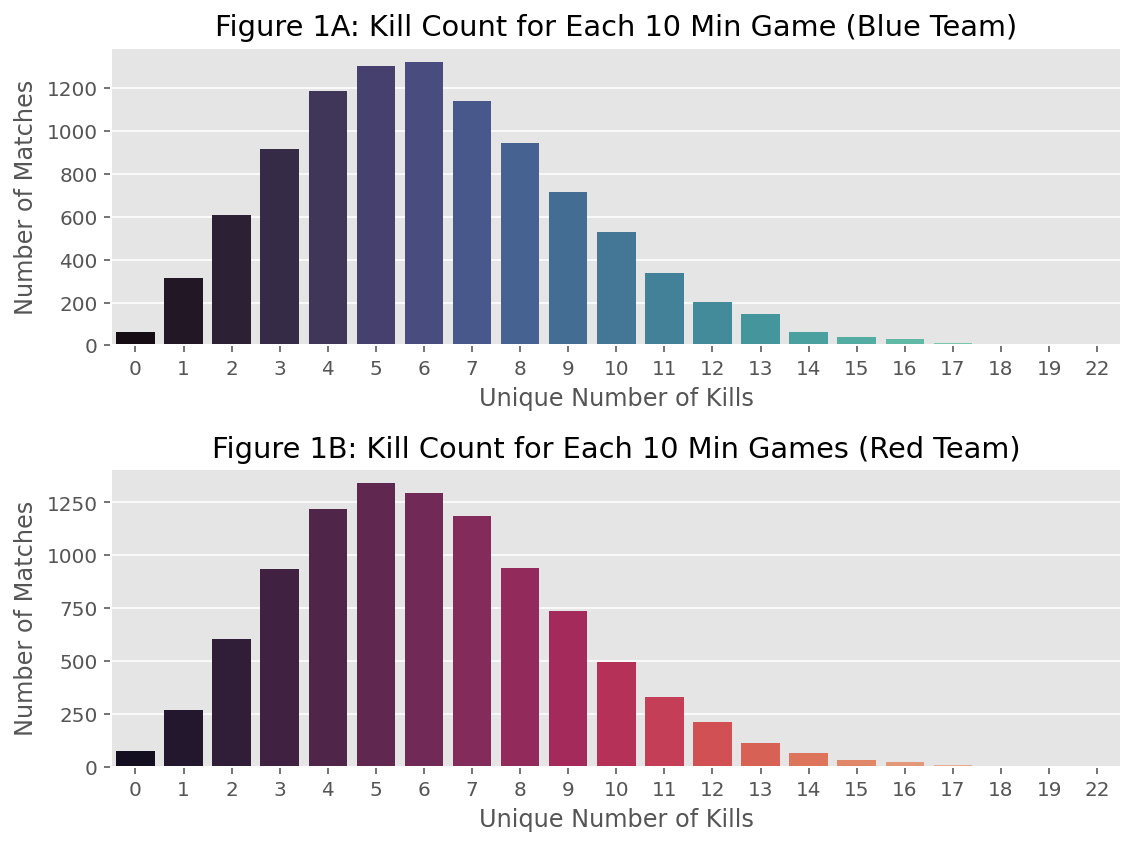

In [105]:
plt.subplots(figsize=(8,6))

plt.subplot(2,1,1)
ax = sns.countplot(x='blueKills', data=df, palette='mako')
plt.xlabel('Unique Number of Kills')
plt.ylabel('Number of Matches')
plt.title('Figure 1A: Kill Count for Each 10 Min Game (Blue Team)')

plt.subplot(2,1,2)
bx = sns.countplot(x='redKills', data=df, palette='rocket')
plt.xlabel('Unique Number of Kills')
plt.ylabel('Number of Matches')
plt.title('Figure 1B: Kill Count for Each 10 Min Games (Red Team)')

plt.tight_layout()
plt.show()

We count the unique number of kills that could happen within the first 10 minutes of the game. As seen in Figure 1A and 1B, the most common number of kills that happens within first 10 minutes of a match is 5 to 6 kills, regardless of whether it was accomplished by the Blue or Red team. This matches closely with the numerical summary which displays the mean of `blueKills` as 6.18 and `redKills` as 6.14. There are few matches where the kill count is higher than 15, which have a possible contribution towards a win for a team.

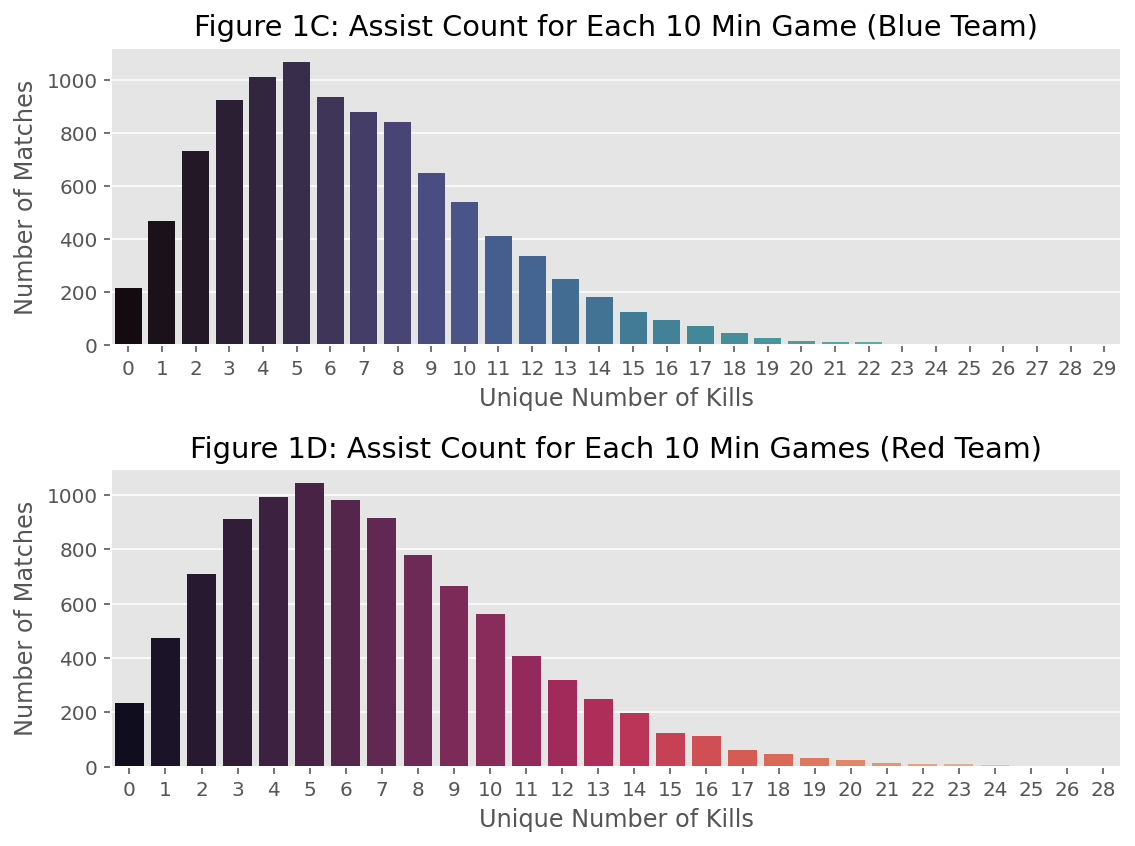

In [119]:
plt.subplots(figsize=(8,6))

plt.subplot(2,1,1)
ax = sns.countplot(x='blueAssists', data=df, palette='mako')
plt.xlabel('Unique Number of Kills')
plt.ylabel('Number of Matches')
plt.title('Figure 1C: Assist Count for Each 10 Min Game (Blue Team)')

plt.subplot(2,1,2)
bx = sns.countplot(x='redAssists', data=df, palette='rocket')
plt.xlabel('Unique Number of Kills')
plt.ylabel('Number of Matches')
plt.title('Figure 1D: Assist Count for Each 10 Min Games (Red Team)')

plt.tight_layout()
plt.show()

Likewise in Figures 1C and 1D, we are able to see a relatively similar spread of data in terms of assists for both teams. This firstly indicates the lack of a team bias, that is, blue team is not able to get assists more easily than the red team or vice-versa. The figures further highlight the fact that most, if not all kills have a contributing assist. Emphasizing the effort of team-play, the data hints communication and cooperation within a team as an indicative sign in generating a lead within the team.

Further analysis with more variables are able to expose how leads are able to be generated and the relationships that certain variables have with one another.

## Bivariate Analysis<a id='biana'></a>

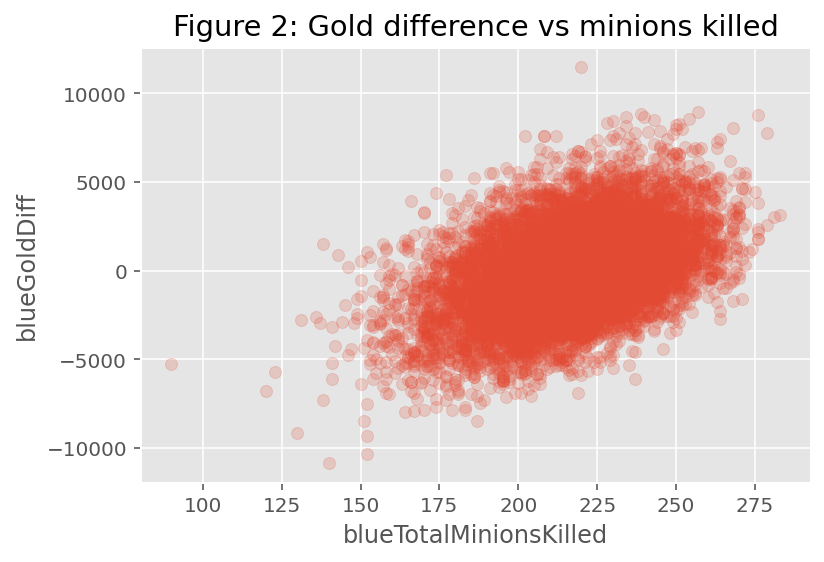

In [106]:
bKills = df['blueKills']
bGDiff = df['blueGoldDiff']
bCs = df['blueTotalMinionsKilled']
bDeaths = df['blueDeaths']
bGold = df['blueTotalGold']
bFBlood = df['blueFirstBlood']
bElite = df['blueEliteMonsters']
bWards = df['blueWardsPlaced']
plt.scatter(bCs, bGDiff,alpha=0.2)
plt.ylabel('blueGoldDiff')
plt.xlabel('blueTotalMinionsKilled')
plt.title('Figure 2: Gold difference vs minions killed')
plt.show()

Shown in figure 2 is the relationship between the amount of minions killed by blue team, and the gold difference between the 2 teams (positive meaning blue has more gold and negative meaning red has more gold). The graph shows a strong correlation between minions killed and an increased gold difference. This implies that having high minion kills is very important to secure a gold lead in the first 10 minutes.

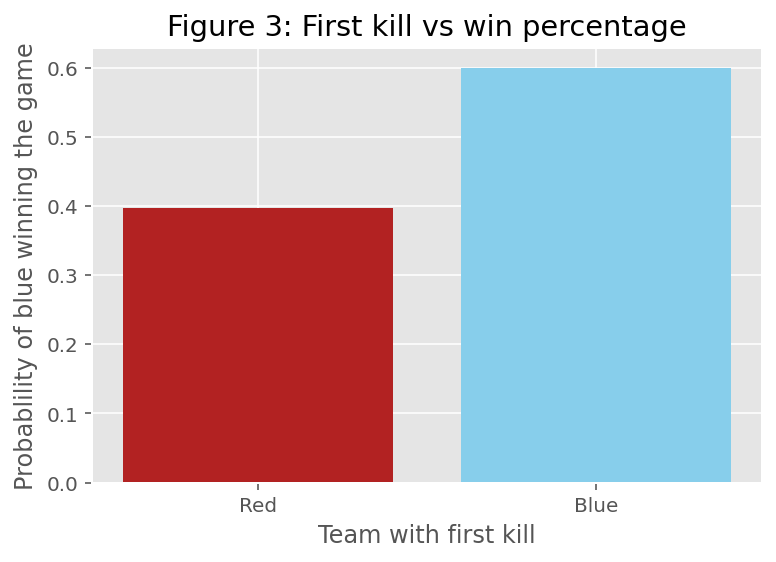

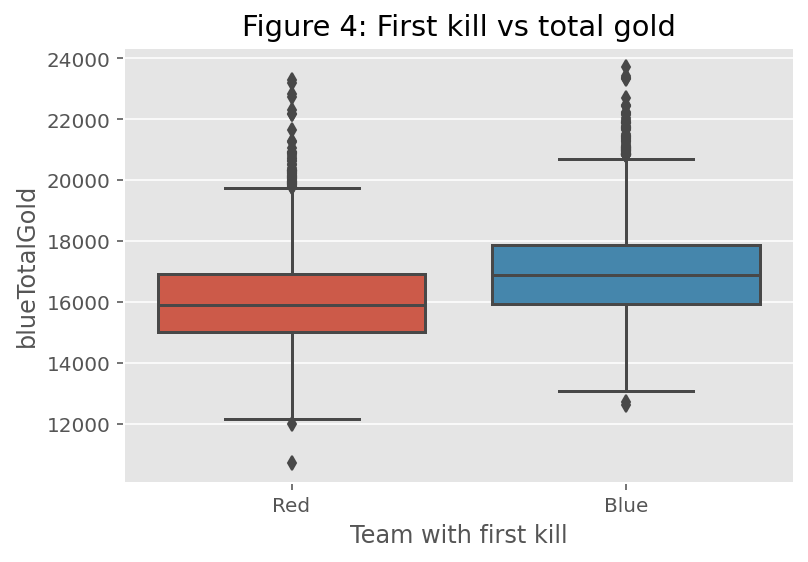

In [107]:
bAveWr = df.groupby('blueFirstBlood').mean()
plt.bar(['Red','Blue'], bAveWr['blueWins'],color=['firebrick','skyblue'])
plt.xlabel('Team with first kill')
plt.ylabel('Probablility of blue winning the game')
plt.title('Figure 3: First kill vs win percentage')
plt.show()
sns.boxplot(df['blueFirstBlood'],bGold)
plt.xticks([0,1], ('Red', 'Blue'))
plt.xlabel('Team with first kill')
plt.title('Figure 4: First kill vs total gold')
plt.show()

As is seen in figures 3 and 4, the first kill is very influential within the first 10 minutes of a game. Figure 4 shows that blue having the first kill greatly increased the median, maximum, minimum and outliers. This implies that the first kill of the game helps the teams ability to get gold faster. Likewise, figure 3 shows an increase in blues likelihood to win if they get the first kill. This suggests that having the first kill greatly increases the probability that your team will go on to win the match.

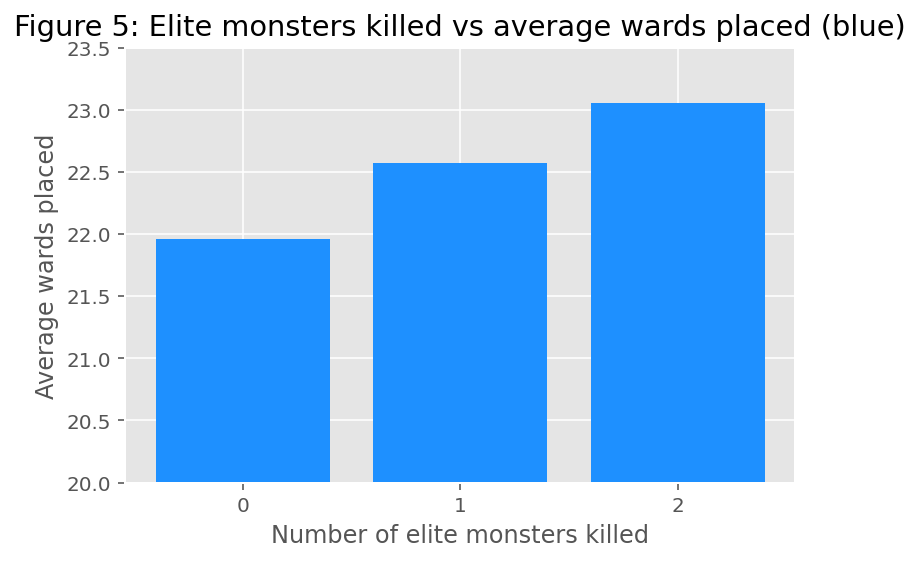

In [108]:
bGrpElite = df[['blueWardsPlaced','blueEliteMonsters']]
bGrpElite = bGrpElite.groupby('blueEliteMonsters').mean()
plt.bar(['0','1','2'],bGrpElite['blueWardsPlaced'],color = 'dodgerblue')
plt.xlabel('Number of elite monsters killed')
plt.ylabel('Average wards placed')
plt.title('Figure 5: Elite monsters killed vs average wards placed (blue)')
plt.ylim(20,23.5)
plt.show()

The figure 5 bar chart shows that the more elite monsters killed there are, the higher the average vision score is. This indicates that teams with a higher vision score are more likely to have more elite monsters killed. More importantly, it demonstrates how a greater amount of wards placed allows for a team to have better information on the status of the elite monsters, and the whereabouts of the enemy team, allowing for the elite monsters to be taken more effectively.

### Multivariate Analysis<a id='multiana'></a>

Prior to multivariate analysis, we will temporarily replace the binary values of "blueWins" with the match result to aid in visualization. 

In [109]:
df['blueWins'] = df['blueWins'].replace([0, 1], ["Red Wins", "Blue Wins"])
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,Red Wins,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,Red Wins,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,Red Wins,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,Red Wins,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,Red Wins,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


***

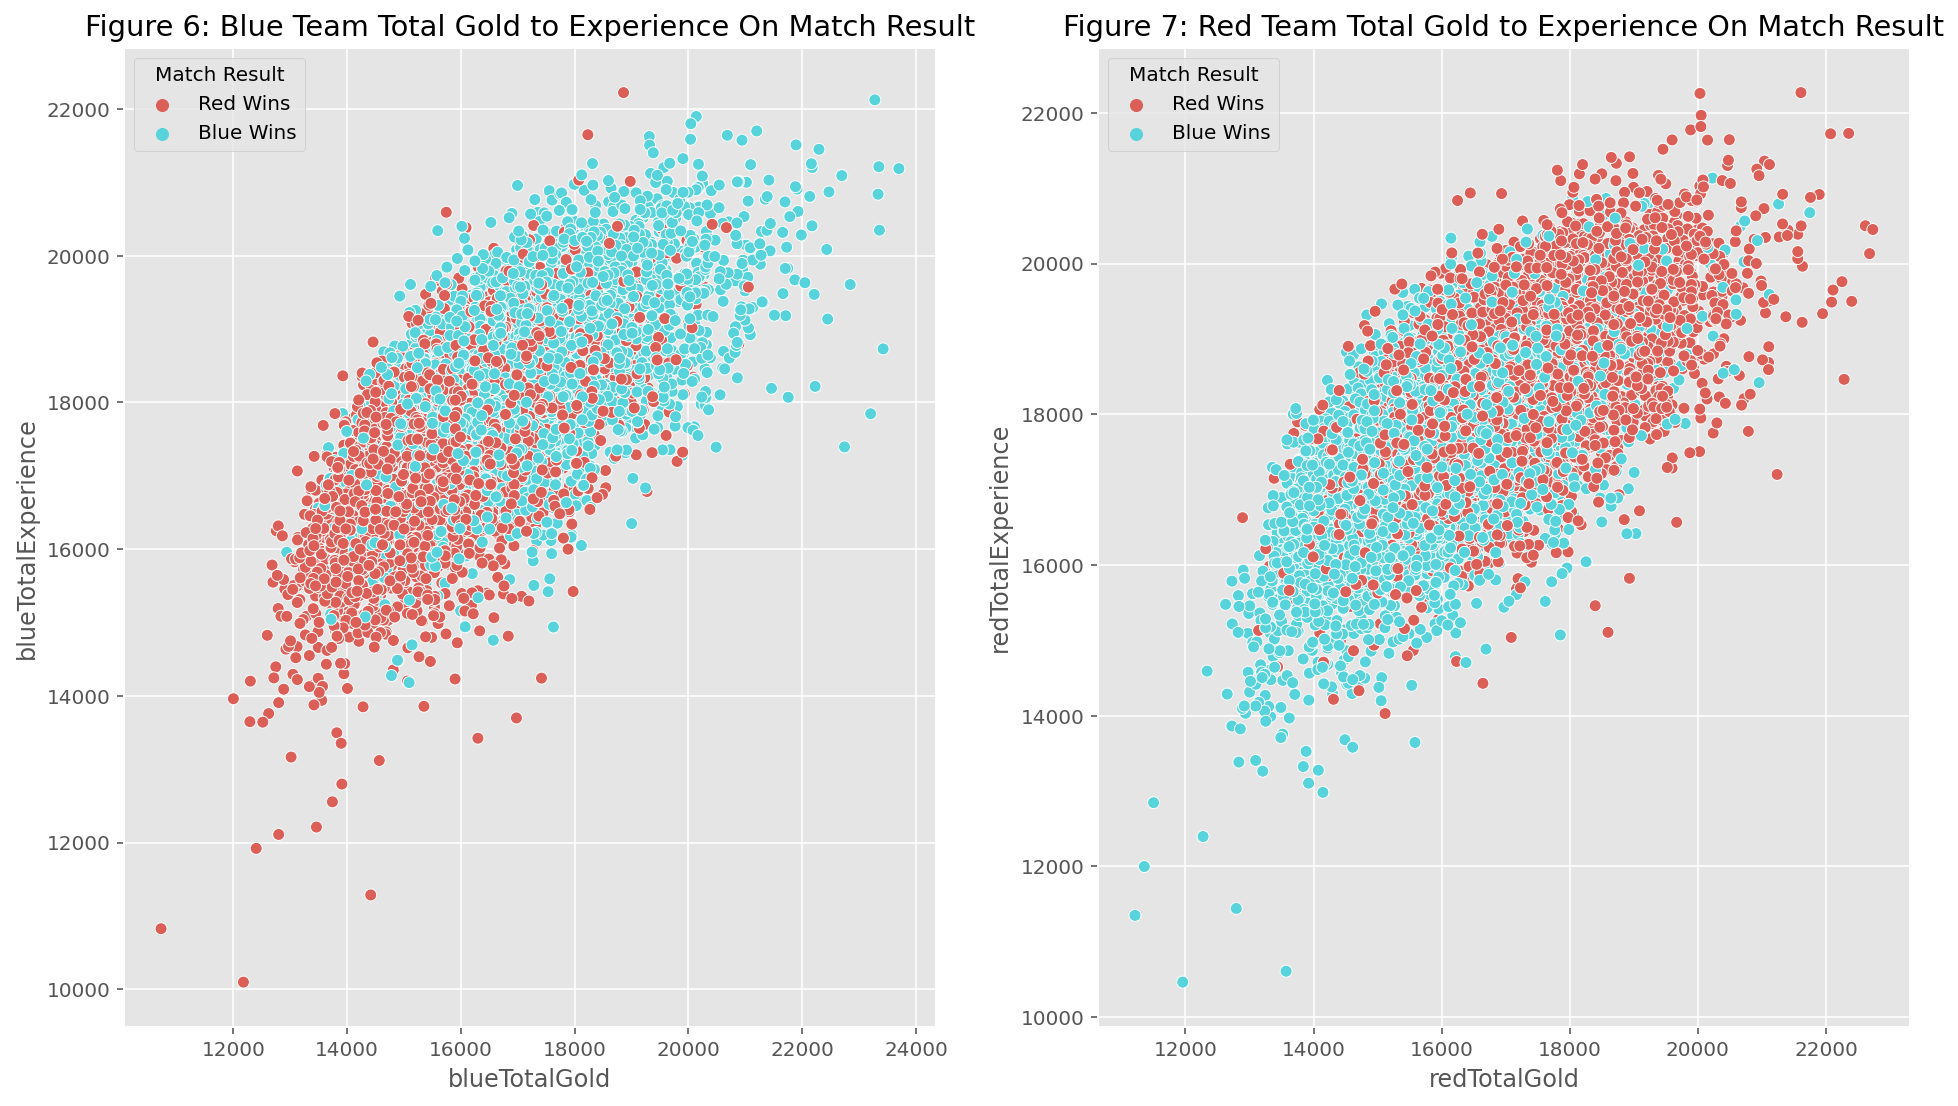

In [110]:
fig, ax =plt.subplots(1,2, figsize = (16, 9))
hue_order = ["Red Wins", "Blue Wins"]
figure1 = sns.scatterplot(
    data = df, 
    x = "blueTotalGold", 
    y = "blueTotalExperience", 
    hue = "blueWins", 
    hue_order = hue_order, 
    palette = "hls",
    ax = ax[0]
    ).set(title="Figure 6: Blue Team Total Gold to Experience On Match Result")
ax[0].legend().set_title('Match Result')

figure2 = sns.scatterplot(
    data = df, 
    x = "redTotalGold", 
    y = "redTotalExperience", 
    hue = "blueWins", 
    hue_order = hue_order, 
    palette = "hls", 
    ax = ax[1]
    ).set(title="Figure 7: Red Team Total Gold to Experience On Match Result")
ax[1].legend().set_title('Match Result')

plt.show()

As seen in figures 6 and 7, we examine possible correlations between the total experience gold that a team has generated based on the match result. There exists a moderately linear relationship between a team's gold, experience and their winning chances. We can therefore infer that the match result is predominantly influenced by the lead generated off of a team's total gold and experience.

Due to such, we now aim to uncover how certain variables allow a team to generate such a lead.

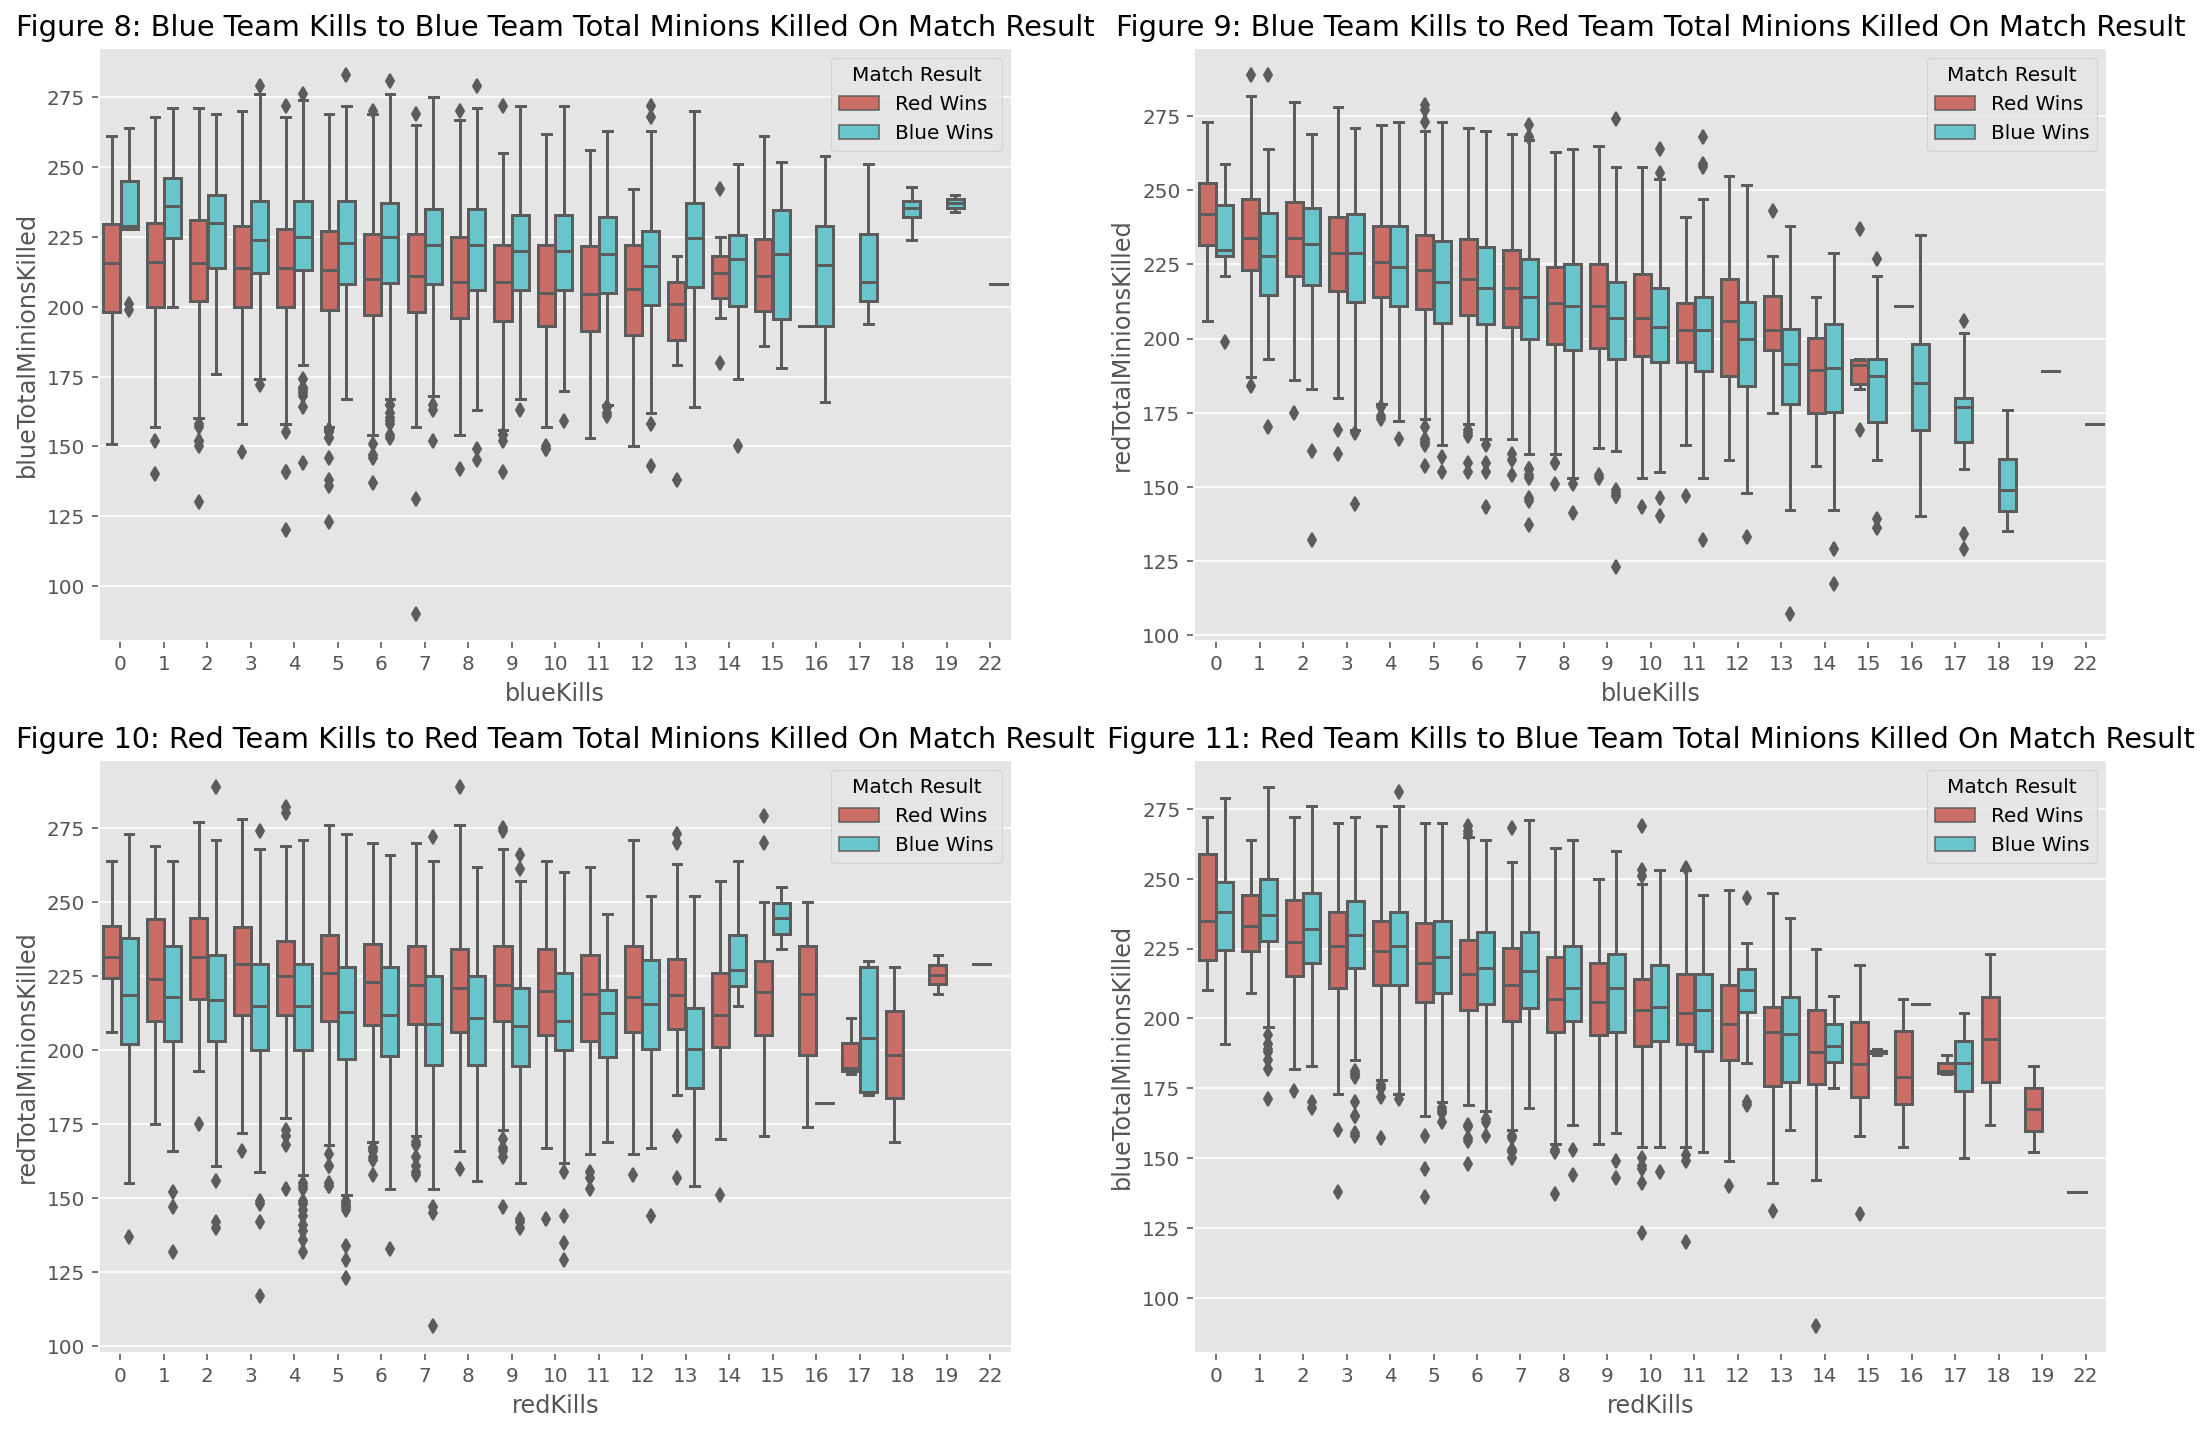

In [111]:
#X team kills on own total minions killed vs enemy total minions killed
#Correlation between kills and cs score, that is, the idea of gold denial to generate a lead

fig, ax =plt.subplots(2,2, figsize = (18, 12))
hue_order = ["Red Wins", "Blue Wins"]
sns.boxplot(
    data = df, 
    y = "blueTotalMinionsKilled", 
    x = "blueKills", 
    hue = "blueWins", 
    hue_order = hue_order, 
    palette = "hls",
    ax = ax[0][0]
    ).set(title="Figure 8: Blue Team Kills to Blue Team Total Minions Killed On Match Result")
ax[0][0].legend().set_title('Match Result')

sns.boxplot(
    data = df, 
    y = "redTotalMinionsKilled", 
    x = "blueKills", 
    hue = "blueWins", 
    hue_order = hue_order, 
    palette = "hls", 
    ax = ax[0][1]
    ).set(title="Figure 9: Blue Team Kills to Red Team Total Minions Killed On Match Result")
ax[0][1].legend().set_title('Match Result')

sns.boxplot(
    data = df, 
    y = "redTotalMinionsKilled", 
    x = "redKills", 
    hue = "blueWins", 
    hue_order = hue_order, 
    palette = "hls",
    ax = ax[1][0]
    ).set(title="Figure 10: Red Team Kills to Red Team Total Minions Killed On Match Result")
ax[1][0].legend().set_title('Match Result')

sns.boxplot(
    data = df, 
    y = "blueTotalMinionsKilled", 
    x = "redKills", 
    hue = "blueWins", 
    hue_order = hue_order, 
    palette = "hls", 
    ax = ax[1][1]
    ).set(title="Figure 11: Red Team Kills to Blue Team Total Minions Killed On Match Result")
ax[1][1].legend().set_title('Match Result')

plt.show()

Figures 8 - 11 illustrate the relationship between a team's kills against enemy champions and the minions slain by the winning and losing team. These relationships aim to uncover team priorities within higher ELO games, whether farming minions for gold has a higher chance of winning in comparison to a more denial-focused approach where killing the enemy champions and preventing them from obtaining gold allows the lead to be generated. 

Figures 8 and 10 show a linear relationship between the number of minions killed for the winning team. Both blue and red team's median values appear to be relatively linear in terms of the total minions killed, suggesting the side that a team is on is arbitrary. However, Figures 9 and 11 displays the opponent's total minions killed based on the current team's kills as a negatively linear trend. 

This suggests that a more hyper-aggressive game, that is, one that attempts to kill the enemy early many times within the first 10 minutes enables a much more significant gold lead. Likewise, said gold lead will enable a similar experience lead that can push one team to win at a higher chance over the higher according to Figures 6 and 7. 

Although kills are able to generate a lead both in terms of gold and experience against the enemy team, it is nevertheless a fact that a game is still undecided, due to towers that defend a team's nexus being relatively disregarded. We now aim to examine the priority of objectives, that is, dragons and heralds, as they may play a more significant role in influencing the winning chances of a team.

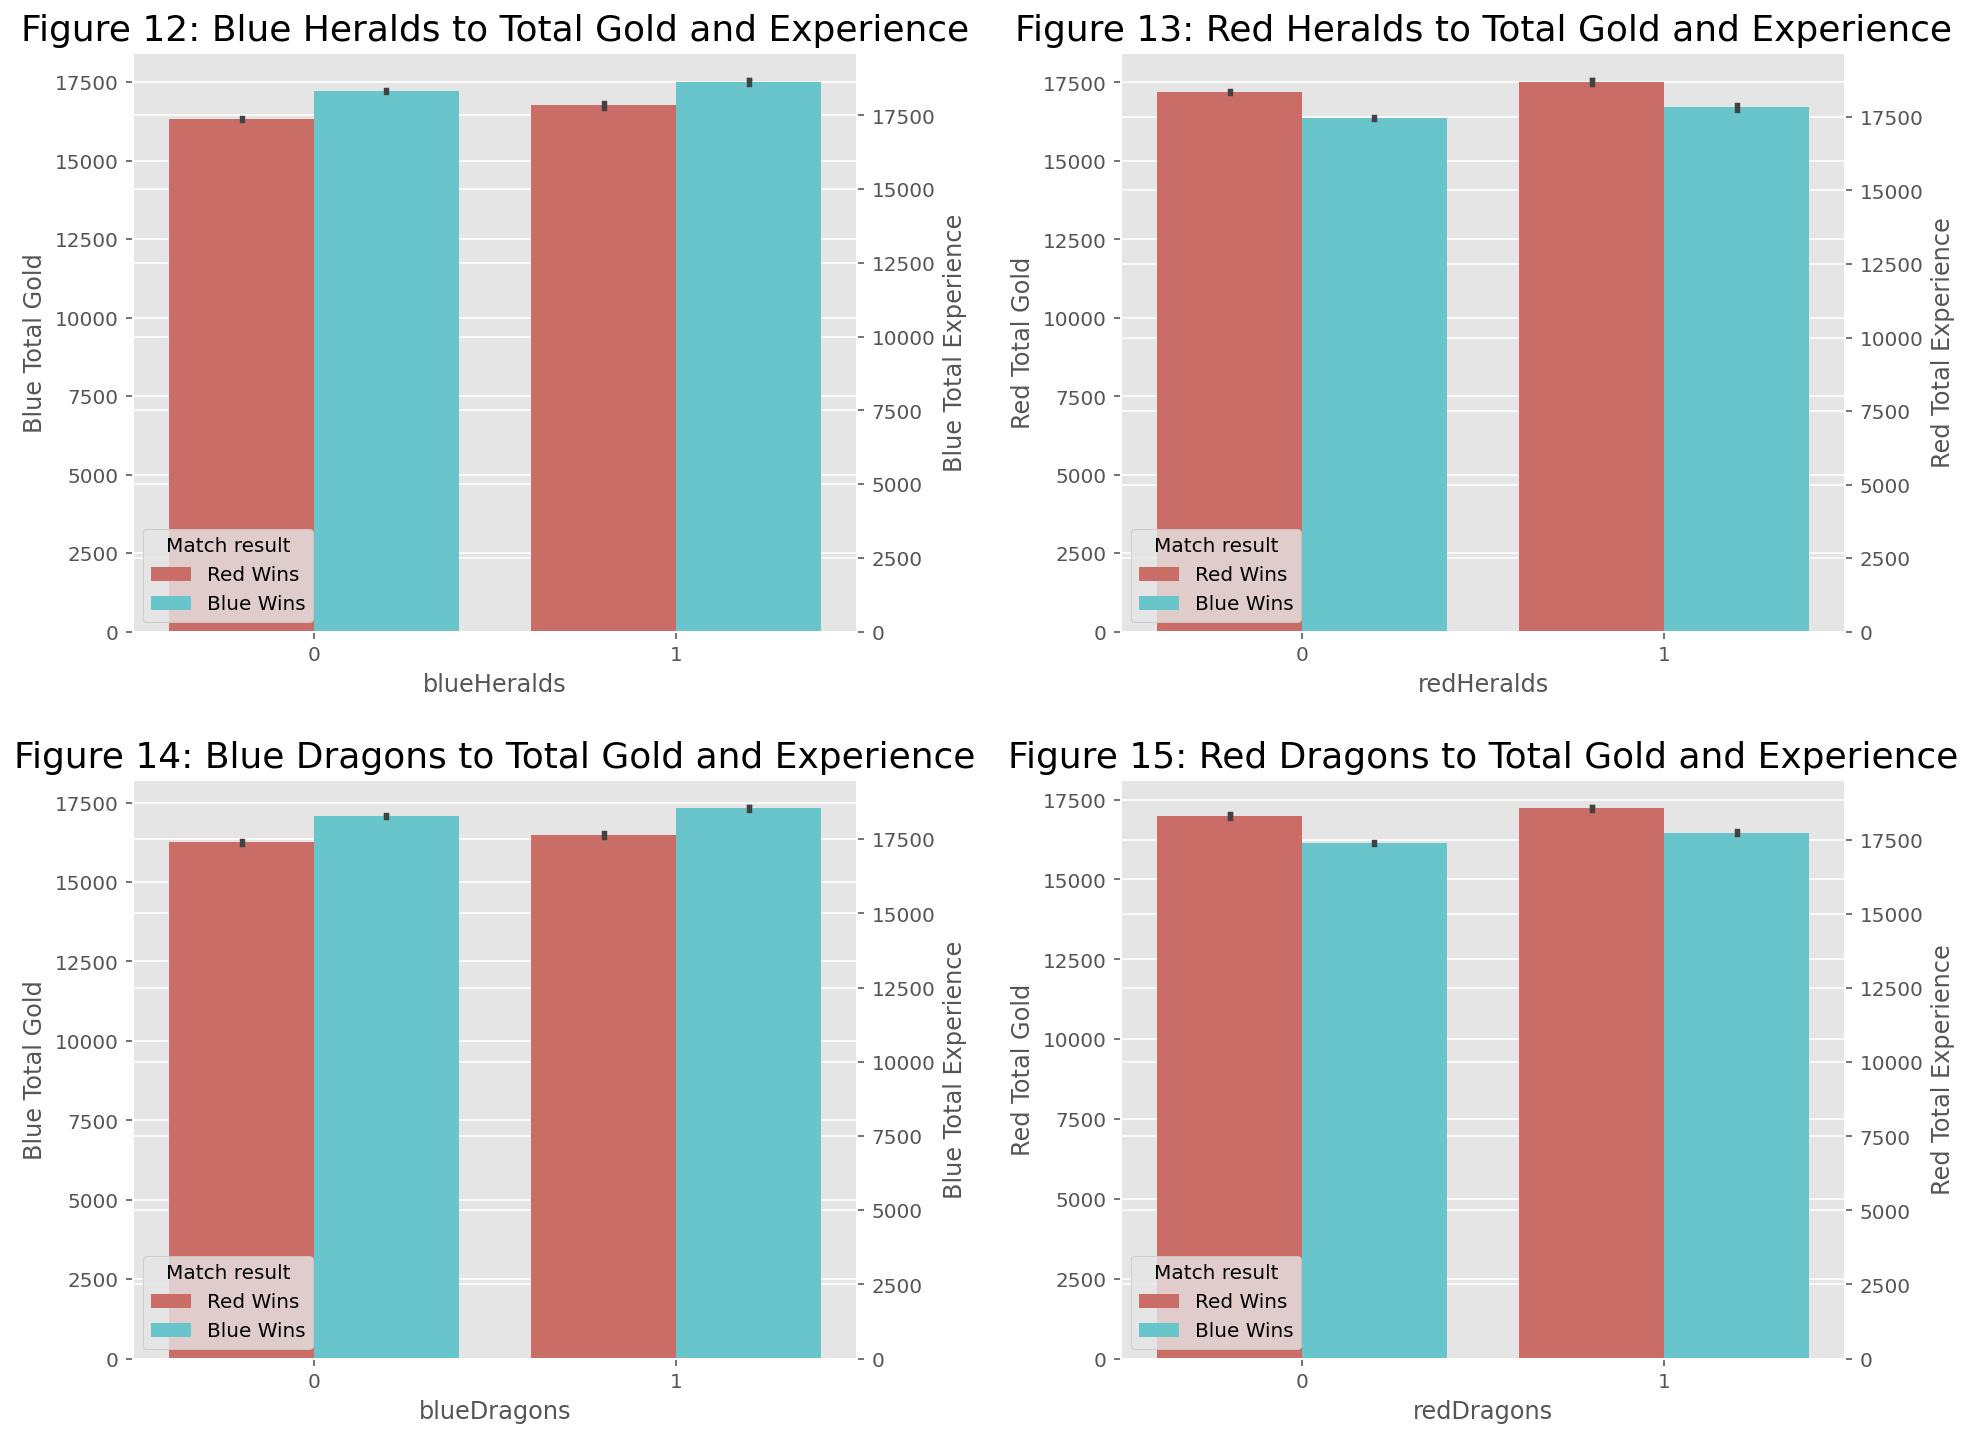

In [112]:
plt.figure(figsize = (14,20))
ax0 = plt.subplot(4, 2, 1)
ax2 = ax0.twinx()
ax3 = plt.subplot(4, 2, 2)
ax4 = ax3.twinx()
ax5 = plt.subplot(4, 2, 3)
ax6 = ax5.twinx()
ax7 = plt.subplot(4, 2, 4)
ax8 = ax7.twinx()

hue_order = ["Red Wins", "Blue Wins"]

ax = sns.barplot(x = "blueHeralds", y = "blueTotalGold", data = df, hue = "blueWins", ax = ax0, palette = "hls", hue_order = hue_order)
ax.set_ylabel('Blue Total Gold')
ax.set_title("Figure 12: Blue Heralds to Total Gold and Experience", fontsize = 18)
ax2 =  sns.barplot(x = "blueHeralds", y = "blueTotalExperience", data = df, hue = "blueWins", ax = ax2, palette = "hls", hue_order = hue_order)
ax2.set_ylabel('Blue Total Experience')
ax2.get_legend().set_title("Match result")

ax3 = sns.barplot(x = "redHeralds", y = "redTotalGold", data = df, hue = "blueWins", ax = ax3, palette = "hls", hue_order = hue_order)
ax3.set_ylabel('Red Total Gold')
ax3.set_title("Figure 13: Red Heralds to Total Gold and Experience", fontsize = 18)
ax4 =  sns.barplot(x = "redHeralds", y = "redTotalExperience", data = df, hue = "blueWins", ax = ax4, palette = "hls", hue_order = hue_order)
ax4.set_ylabel('Red Total Experience')
ax4.get_legend().set_title("Match result")

ax5 = sns.barplot(x = "blueDragons", y = "blueTotalGold", data = df, hue = "blueWins", ax = ax5, palette = "hls", hue_order = hue_order)
ax5.set_ylabel('Blue Total Gold')
ax5.set_title("Figure 14: Blue Dragons to Total Gold and Experience", fontsize = 18)
ax6 =  sns.barplot(x = "blueDragons", y = "blueTotalExperience", data = df, hue = "blueWins", ax = ax6, palette = "hls", hue_order = hue_order)
ax6.set_ylabel('Blue Total Experience')
ax6.get_legend().set_title("Match result")

ax7 = sns.barplot(x = "redDragons", y = "redTotalGold", data = df, hue = "blueWins", ax = ax7, palette = "hls", hue_order = hue_order)
ax7.set_ylabel('Red Total Gold')
ax7.set_title("Figure 15: Red Dragons to Total Gold and Experience", fontsize = 18)
ax8 =  sns.barplot(x = "redDragons", y = "redTotalExperience", data = df, hue = "blueWins", ax = ax8, palette = "hls", hue_order = hue_order)
ax8.set_ylabel('Red Total Experience')
ax8.get_legend().set_title("Match result")

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.show()

Figures 12 to 15 display the effects of killing the first herald or dragon that spawns within the game have on the total gold, total experience and winning chances of the game.

The fact that all 4 figures have relatively little disparity with one another indicates the lack of a significant effect that early objectives such as dragons and herald on the effect of both the game, as well as the total gold and experience. We can thus assume that said objectives should not be as much of a priority in comparison to getting kills on the enemy team or killing minions have on the effect of the game.

We will now revert the "blueWins" variable back to it's original.

In [113]:
df['blueWins'] = df['blueWins'].replace( ["Red Wins", "Blue Wins"],[0, 1])
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


***
# Literature Review<a id='litrev'></a>

###  Introduction<a id='litintro'></a>

Rise of the “eSports” genre has brought forth an element of competitive play similar to physical sports with the NBA, AFL, MLB and others - organized teams that compete for victory against one another. Winning as an organized team is however subjectively easier to winning with a random selection of teammates, and in the case of eSports such as League of Legends that force random, temporary teams, nearing the upper echelons becomes increasingly difficult where more coordinated plays within a team become more and more apparent. It begs the question how top players in the top leagues are still able to flourish in highly competitive and coordinated environments, each with new teammates to cooperate with. This literature review, through existing journal articles and conference papers, aims to uncover the many other elements that contribute towards a team’s chance of winning a match that is not present in our predominantly nominal dataset. As such, understanding underlying themes such as the motivations of players, the social influences one must adapt in order to strive, as well as the skills that are utilized to both better and maintain such abilities are vital to interpret how different, external factors can influence the winning chances of a match.

### Cooperation and behaviour<a id='litcab'></a>

Unlike traditional sports that maintain a focus on team-play, League of Legends ranked games (unlike it’s professional counterpart) is a predominantly solo-focused game. Multiplayer elements that force the player to work in random teams are constantly juxtaposed with individual interest such as the champion a player wishes to play, what role they wish to play in the team or their motivation and purpose for playing the game. Alongside is the element of randomization in matchmaking for both a player’s allies and enemies. Within such games that facilitates a constant balance between cooperation within the team as well as decision making that can put the team at an advantage over the enemy, the prominence of cooperation becomes highly sought after as a factor that influences winning the match [[1]](#source1). As a result of this, cooperation is more apparent in games with a “higher collective intelligence” [[1]](#source1) - higher ELO games with many players that have an inherent understanding of the fundamentals necessary to winning a game. Whether this communication be through pings or team chat: “the overall level of interaction within a network is related to a stronger performance” [[2]](#source2) - not exclusively belonging to the higher ladder but being more common throughout. Similarly, conflict that arises within a team demonstrates negative effects on the winning chances [[3]](#source3). The converse of a team-oriented group, a more centralized “shot-caller” approach, depicts the act of centralization as a “negative influence” [[2]](#source2). This forces many players to adapt and develop an “equal” mindset in order to maintain functional team cooperation within each match [[8]](#source8). It is likewise a sign to take a break when a player is unable to maintain a steady mindset, with one study’s interviewee stating that: “playing while angry or stressed makes you surprisingly bad at League of Legends. Take a break from time to time” [[8]](#source8), highlighting the importance of individual performance in functional team cooperation and extensively, winning the game.

### Dysfunctionality within a team<a id='litdys'></a>

Likewise to benefits, factors that inhibit chances of winning a match expand from more than just a weak team-link. Including many debilitating behaviours ranging from abusive language, griefing, to more personal factors such as poor individual performance or playing an unfamiliar role [[13]](#source13), these behaviours often stem from a variety of uncontrollable circumstances. Likewise, the term “tilting” [[7]](#source7) within a player encompasses unregulated emotions that can influence their individual performance, decision making, and are often a result of uncontrollable circumstances such as frustration towards an underperforming player [[7]](#source7). As a consequence, players are naturally inclined to surrender the match and move on to the next match [[12]](#source12). Such results of conflict ultimately diminish winning chances [[3, 13]](#source3) as well as further individual performance [[6]](#source6). Player behaviour and interaction with one another thus becomes vital to maintain, ensuring consistency in winning the match, especially higher up the ranking ladder where every match counts [[11]](#source11); “They discipline their own ways of interaction to facilitate collaboration” [[8]](#source8).

### Priority within a team<a id='litprio'></a>

Regardless of how efficient a team may be, it is nevertheless a requirement for players within the team to understand which aspects of the game are placed of higher priority, that is, decision making may serve as a crowning factor in influencing the result of a game. One article depicts the improvement in probabilistic inference within action video games [[4]](#source4), draws attention to the element of randomization that inhibits “standard learning paradigms”. Due to such, players become naturally adept at consciously making “better” decisions through experience - speculations that “neural mechanisms are responsible for a faster transfer of learning.” Under the clause that “situations are rarely, if ever, repeated”, this further highlights how higher ranked, more experienced players are often more adequate at making satisfactory decisions than many other players, possessing a rank that reflects such skills and is potentially a part as to why they climb the ladder in the first place [[5]](#source5). 


### Motivation<a id='litmot'></a>

Many game companies offer rewards to diminish decline in intrinsic motivation, potentially playing a role in the “underlying motivational regulations for playing LoL” [[10]](#source10). Such a goal or reward may come in a multitude of ways, whether that be through personal development, proving one’s ability, glory, fame or money. Due to such, “A player’s motivation towards playing a game shapes their player experience and in-game behaviour” [[10]](#source10). Conversely, one’s experience may also shape a player’s motivation to continue improvement within the game [[5]](#source5). Such values that serve as clear reflections to one another epitomizes what allows top performers of the LoL player base to flourish in their competitive environments unlike more casual play, that is, to attain the goal or reward they desire and the motivation to continue pushing for said goal/reward. Regardless of the goal or reward, studies have proven that the reward one receives for their effort “increases their effort and improves performance” [[5]](#source5). Alongside such, it has likewise been illustrated how a more identified group continues to push their limits in contrast to a less identified group, whose motivation begins to decline along with their effort and motivation to play the game [[5]](#source5). This is especially highlighted in higher ranks of the ladder; players that belong to the top 0.5% are naturally identified as “the best” within the player base, potentially serving as a contributing factor allowing players to naturally continue seeking for new paths of improvement that better their chances of winning.


### Conclusion<a id='litconc'></a>

It is apparent that winning a match is not exclusive to mere statistics, as many external factors play a crucial role in enabling victory within a team. Temporary teams that exhibit such desirable qualities such as cooperation, effective communication and a good understanding of the game at its core prove to have a greater chance of winning. Within these qualities, it is likewise more commonplace within higher ranked matches to encounter said characteristics - the motivation to win a game pushes players to continue to exhibit and develop these qualities in pursuit of their goals.
***

## Summary and Conclusion<a id='sumconc'></a>

Understanding the factors that can increase one's chances of winning is a crucial tool that many competitive teams worldwide utilize to continuously optimize their performance. Games that come with a multitude of factors that can manipulate this winning percentage, many as uncontrollable, offer a competitive experience that other sports or games may be unable to offer. The Diamond-ranked "top 0.5%" of players within the League of Legends community continue to sharpen and maintain a unique set of skills that allows themselves to continue to push and climb the ladder. This project which scrutinizes the many niches within these players in high ranking matches, aims to deliver a model that can highlight the absolute priorities that one must consider in order to influence the chances of winning.

Phase I of this project utilized many data cleaning, preprocessing and data visualization to interpret how certain variables worked in coalition with one another. We dropped 12 total columns due to redundancy and likewise checked for missing values which had no issues. Outliers were left unhandled as although they may skew the data to favour a particular factor (i.e the number of wards placed), we felt it was important to consider even games such as those, we may be able to see further reasonings as to what resulted in such values in further modeling phases as well as how such values may have influenced the blueWins variable. Sampling was also put in place to reduce time when running data visualization and further models in the second phase of the project.

Through data visualization we are able to uncover some of the factors that may influence winning percentages of a team. Singular variables were first examined such as the frequency of the number of kills within the first 10 minutes of a match. This assisted in giving insight as to what averages were ought to be seen in high ELO games. Bivariate and multivariate analysis expands upon what causes leads to occur, as well as how they are being generated in the first place. The data illustrates the importance of farming, shown by how the number of minions killed is positively correlated to the overall gold difference within a team. Likewise, 'First Blood' is shown to be a large determining factor on the flow of a game, increasing both chances of winning by 10% suggested by the Figure 3 and the total gold that is expected to be generated in Figure 4. Similarly, visualizations that depict a positively linear relationship between total gold and experience was seen in multivariable plots, illustrating how the increase in one often is reflected upon the other. Exposing further objective control through Figures 5 highlights the importance of ward in securing objectives, however offer to be negligible in Figures 12 - 15. 

We are able to offer some initial insight to what factors influence win rate, which are that generating an early lead through champion kills as well as minion kills allow for a heightened chance of winning as a gold lead is often conversely relative to an experience lead. Likewise, the team that can get "First Blood" often is able to snowball the lead into more kills, which directly translates to higher gold and experience leads. Further analysis is however required to expose further relationships and causes that can correlate variables with one another.

***
## References

[1]<a id='source1'></a> Birk, M., Mandryk, R., & Atkins, C. (2016). The motivation Push of Games: The interplay of Intrinsic Motivation and External Rewards in Games for Training. 2016 Annual Symposium on Computer-Human Interaction in Play (CHI PLAY '16), 291-303. Retrieved October 1, 2021, from https://dl.acm.org/doi/10.1145/2967934.2968091

[2]<a id='source2'></a> Brühlmann, F., Baumgartner, P., Wallner, G., Kriglstein, S., & Mekler, E. (2020). Motivational Profiling of League of Legends Players. Frontiers in Psychology. Retrieved October 1, 2021, from https://www.frontiersin.org/articles/10.3389/fpsyg.2020.01307/full

[3]<a id='source3'></a> Demediuk, S., Murrin, A., Bulger, D., Hitchens, M., Drachen, A., Raffe, W., & Tamassia, M. (2018). 2018. Player retention in league of legends: a study using survival analysis, 1-9. Retrieved October 1, 2021, from https://dl.acm.org/doi/abs/10.1145/3167918.3167937

[4]<a id='source4'></a> Green, C., Pouget, A., & Bavelier, D. (2010). Improved Probabilistic Inference as a General Learning Mechanism with Action Video Games. Current Biology, 20(17), 1573-1579. Retrieved October 1, 2021, from https://www.researchgate.net/publication/46219822_Improved_Probabilistic_Inference_as_a_General_Learning_Mechanism_with_Action_Video_Games

[5]<a id='source5'></a> Kim, Y., Engel, D., Woolley, A., Lin, J., McArthur, N., & Malone, T. (2016). What Makes a Strong Team? Collective Intelligence Predicts Team Performance in League of Legends. Academy of Management Proceedings(1), 13564. Retrieved October 1, 2021, from https://www.researchgate.net/publication/313739142_What_Makes_a_Strong_Team_Using_Collective_Intelligence_to_Predict_Team_Performance_in_League_of_Legends

[6]<a id='source6'></a> Kou Yubo. (2020). Toxic Behaviors in Team-Based Competitive Gaming: The Case of League of Legends. CHI PLAY'2020. Retrieved October 2, 2021, from https://www.researchgate.net/publication/343696767_Toxic_Behaviors_in_Team-Based_Competitive_Gaming_The_Case_of_League_of_Legends

[7]<a id='source7'></a> Kou, Y., & Gui, X. (2014). Playing with strangers: understanding temporary teams in league of legends. Proceedings of the first ACM SIGCHI annual symposium on Computer-human interaction in play, 161-169. Retrieved October 1, 2021, from https://dl.acm.org/doi/abs/10.1145/2658537.2658538

[8]<a id='source8'></a> Kou, Y., & Gui, X. (2017). The Rise and Fall of Moral Labor in an Online Game Community. 2017 ACM Conference on Computer Supported Cooperative Work and Social Computing (CSCW '17 Companion), (pp. 223-226). New York. Retrieved October 1, 2021, from https://dl.acm.org/doi/pdf/10.1145/3022198.3026312

[9]<a id='source9'></a> Kou, Y., Gui, X., & Kow, Y. (2016). Ranking practices and distinction in League of Legends. 3rd ACM SIGCHI Annual Symposium on Computer-Human Interaction in Play, CHI PLAY 2016 (pp. 4-9). Austin: CHI PLAY 2016 - Proceedings of the 2016 Annual Symposium on Computer-Human Interaction in Play. Retrieved October 1, 2021, from https://pennstate.pure.elsevier.com/en/publications/ranking-practices-and-distinction-in-league-of-legends

[10]<a id='source10'></a> Monge, C., & O'Brien, T. (2021). Effects of individual toxic behavior on team performance in League of Legends. Media Psychology, 1-23. Retrieved October 1, 2021, from https://www.tandfonline.com/doi/full/10.1080/15213269.2020.1868322

[11]<a id='source11'></a> Mora-Cantallops, M., & Sicilia, M.-Á. (2019). Team efficiency and network structure: The case of professional League of Legends. Social Networks, 58, 105-115. Retrieved October 1, 2021, from https://www.sciencedirect.com/science/article/pii/S0378873319300693

[12]<a id='source12'></a> Sharma, M., Anand, N., Amudhan, S., & Vashisht, A. (2021). Online gaming and tilting: Psychosocial exploration for promotion of emotional regulation. International Journal of Social Psychiatry, 1-3. Retrieved October 1, 2021, from https://journals.sagepub.com/doi/abs/10.1177/00207640211028602

[13]<a id='source13'></a> Shin, S.-J., Jeong, D., & Park, E. (2021). Effects of conflicts on outcomes: The case of multiplayer online games. Entertainment Computing, 38, 100407. Retrieved October 1, 2021, from https://www.sciencedirect.com/science/article/pii/S1875952121000045
***